In [22]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.pyplot import subplot

def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)


#plt.plot(x, y)
bo = BayesianOptimization(target, {'x': (-2, 10)})




def posterior(bo, x, xmin=-2, xmax=10):
    xmin, xmax = -2, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 0.100 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    

# 初始化

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.91935 |    0.6677 | 
    2 | 00m00s |    0.80983 |    4.3213 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


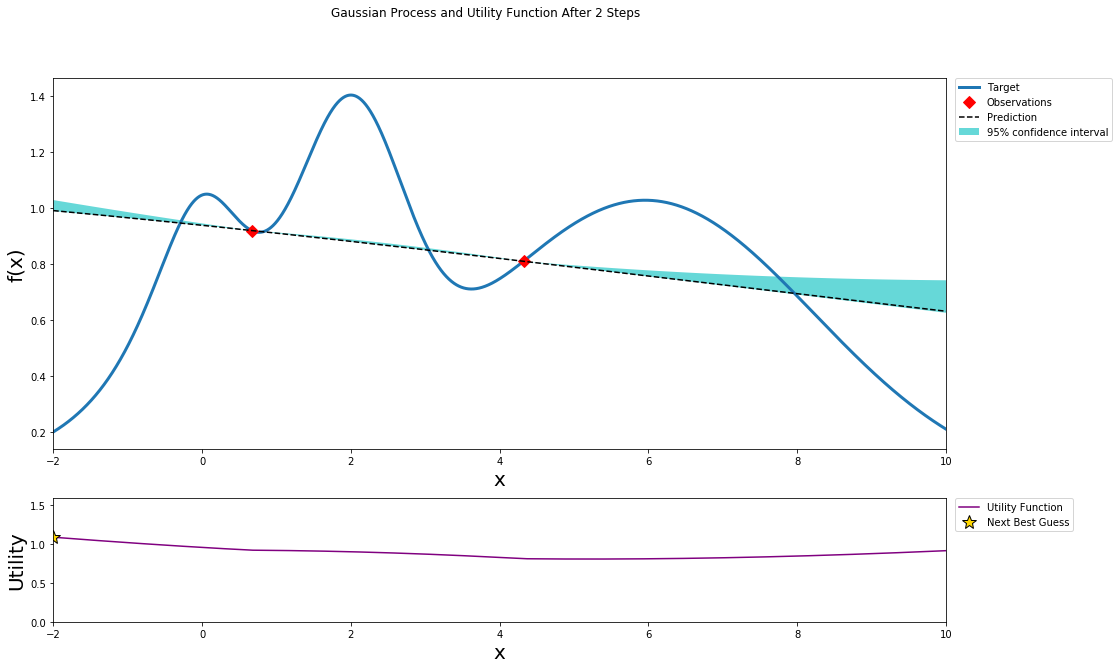

In [23]:
bo.maximize(init_points=2, n_iter=0, acq='ucb', kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m01s |    0.20166 |   -2.0000 | 


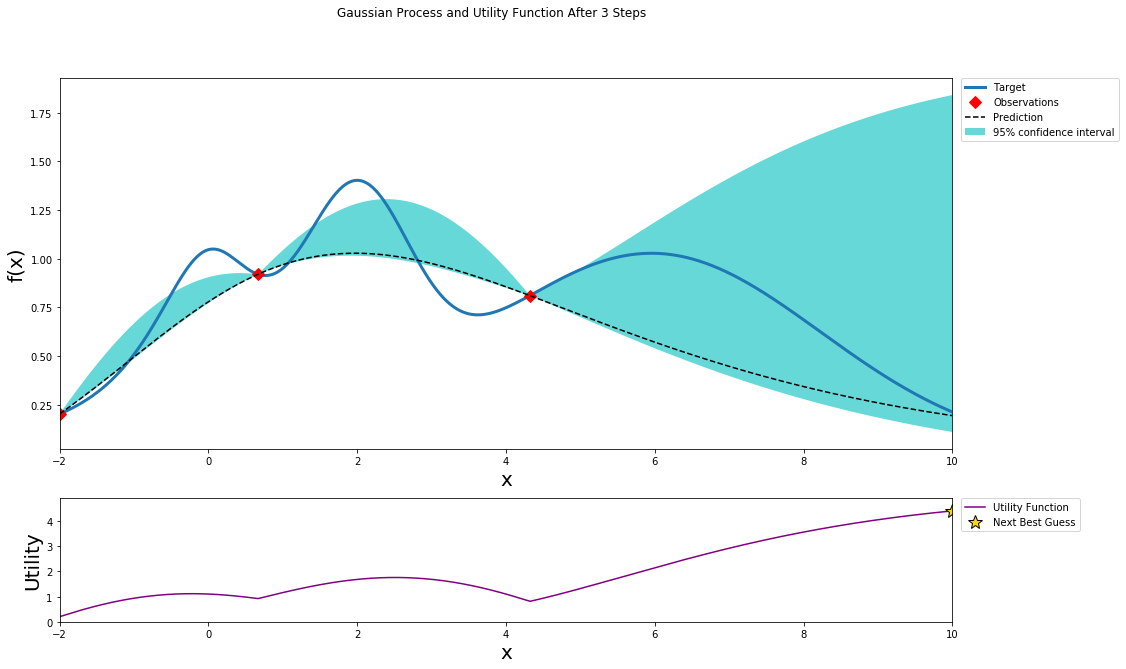

In [24]:
bo.maximize(init_points=0, n_iter=1, acq='ucb', kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    4 | 00m00s |    1.27338 |    2.4005 | 


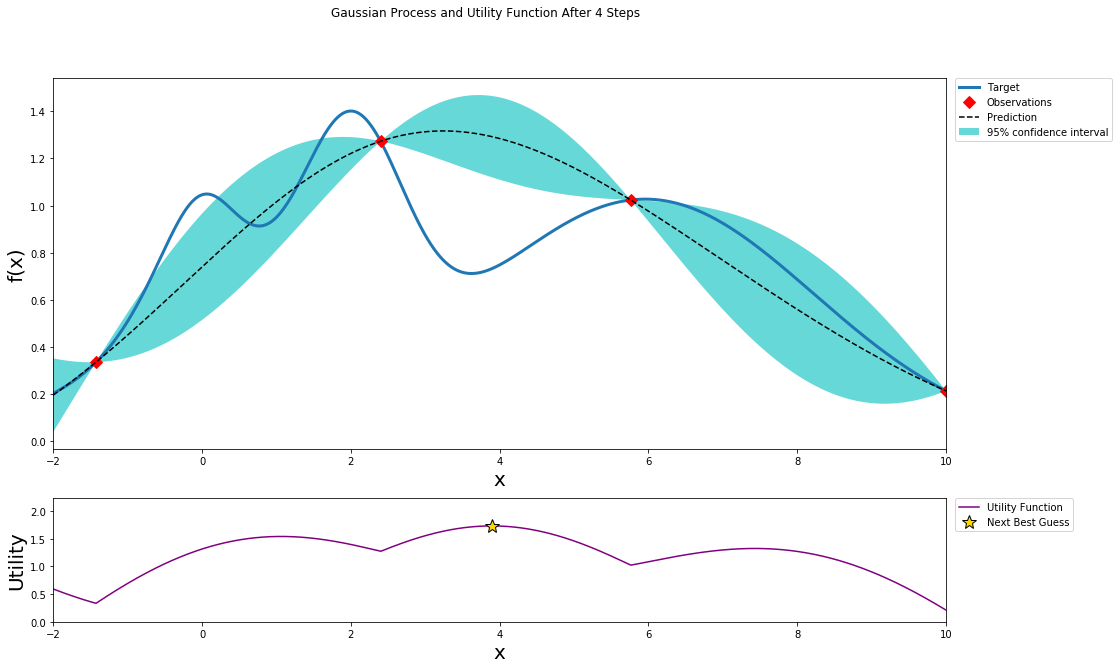

In [16]:
bo.maximize(init_points=0, n_iter=1, acq='ucb', kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    5 | 00m01s |    1.11157 |    1.3286 | 


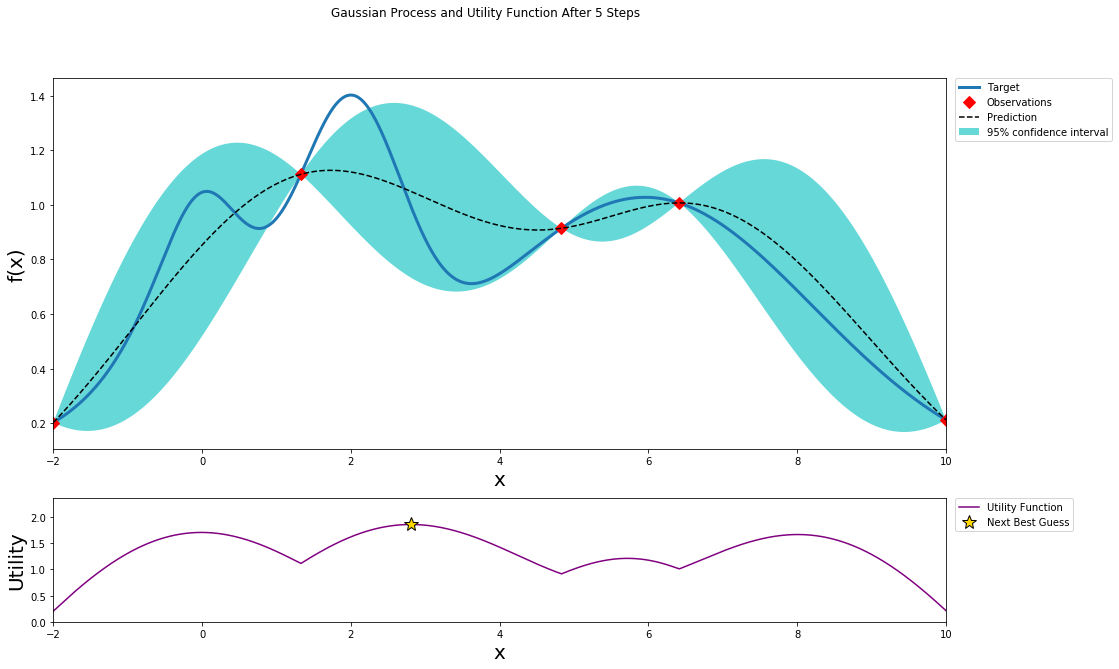

In [5]:
bo.maximize(init_points=0, n_iter=1, acq='ucb', kappa=5)
plot_gp(bo, x, y)